## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-2
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.99, 0.95, 0.9, 0.85]

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for momentum in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Momentum = %.6f" % (momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-momentum-%s" % str(momentum)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Momentum = 0.990000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
  512/50000 [......................

d:\Anaconda3\envs\pt\lib\site-packages\keras\callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125005). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 2900s 58ms/step - loss: 1.8222 - acc: 0.3497 - val_loss: 1.6694 - val_acc: 0.4131
Epoch 2/50
50000/50000 [==============================] - 1569s 31ms/step - loss: 1.5857 - acc: 0.4366 - val_loss: 1.5727 - val_acc: 0.4414
Epoch 3/50
50000/50000 [==============================] - 840s 17ms/step - loss: 1.5031 - acc: 0.4655 - val_loss: 1.5088 - val_acc: 0.4660
Epoch 4/50
50000/50000 [==============================] - 406s 8ms/step - loss: 1.4744 - acc: 0.4733 - val_loss: 1.4998 - val_acc: 0.4680
Epoch 5/50
50000/50000 [==============================] - 853s 17ms/step - loss: 1.4366 - acc: 0.4880 - val_loss: 1.4824 - val_acc: 0.4700
Epoch 6/50
50000/50000 [==============================] - 533s 11ms/step - loss: 1.4032 - acc: 0.4989 - val_loss: 1.4782 - val_acc: 0.4692
Epoch 7/50
50000/50000 [==============================] - 202s 4ms/step - loss: 1.3645 - acc: 0.5124 - val_loss: 1.4722 - val_acc: 0.4797
Epoch 8/50
50000/50000 [==============

50000/50000 [==============================] - 184s 4ms/step - loss: 1.6008 - acc: 0.4329 - val_loss: 1.5693 - val_acc: 0.4326
Epoch 3/50
50000/50000 [==============================] - 305s 6ms/step - loss: 1.5126 - acc: 0.4617 - val_loss: 1.6105 - val_acc: 0.4313
Epoch 4/50
50000/50000 [==============================] - 350s 7ms/step - loss: 1.4520 - acc: 0.4846 - val_loss: 1.5265 - val_acc: 0.4443
Epoch 5/50
50000/50000 [==============================] - 475s 9ms/step - loss: 1.4069 - acc: 0.4976 - val_loss: 1.5231 - val_acc: 0.4624
Epoch 6/50
50000/50000 [==============================] - 43s 869us/step - loss: 1.3664 - acc: 0.5149 - val_loss: 1.4810 - val_acc: 0.4797
Epoch 7/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.3282 - acc: 0.5290 - val_loss: 1.4472 - val_acc: 0.4956
Epoch 8/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.2918 - acc: 0.5397 - val_loss: 1.4226 - val_acc: 0.4933
Epoch 9/50
50000/50000 [====================

50000/50000 [==============================] - 624s 12ms/step - loss: 1.5511 - acc: 0.4505 - val_loss: 1.7133 - val_acc: 0.3926
Epoch 4/50
50000/50000 [==============================] - 181s 4ms/step - loss: 1.4893 - acc: 0.4716 - val_loss: 1.5528 - val_acc: 0.4403
Epoch 5/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.4442 - acc: 0.4886 - val_loss: 1.5422 - val_acc: 0.4428
Epoch 6/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.4009 - acc: 0.5044 - val_loss: 1.5513 - val_acc: 0.4370
Epoch 7/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.3639 - acc: 0.5172 - val_loss: 1.4309 - val_acc: 0.4929
Epoch 8/50
50000/50000 [==============================] - 6s 130us/step - loss: 1.3313 - acc: 0.5285 - val_loss: 1.4183 - val_acc: 0.4974
Epoch 9/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.2982 - acc: 0.5402 - val_loss: 1.4539 - val_acc: 0.4851
Epoch 10/50
50000/50000 [===================

50000/50000 [==============================] - 6s 126us/step - loss: 1.5290 - acc: 0.4598 - val_loss: 1.5780 - val_acc: 0.4338
Epoch 5/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.4875 - acc: 0.4740 - val_loss: 1.5560 - val_acc: 0.4452
Epoch 6/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.4403 - acc: 0.4901 - val_loss: 1.4868 - val_acc: 0.4702
Epoch 7/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.4022 - acc: 0.5041 - val_loss: 1.4928 - val_acc: 0.4632
Epoch 8/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.3713 - acc: 0.5151 - val_loss: 1.4338 - val_acc: 0.4891
Epoch 9/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.3469 - acc: 0.5246 - val_loss: 1.4491 - val_acc: 0.4800
Epoch 10/50
50000/50000 [==============================] - 6s 130us/step - loss: 1.3184 - acc: 0.5323 - val_loss: 1.4230 - val_acc: 0.4969
Epoch 11/50
50000/50000 [===================

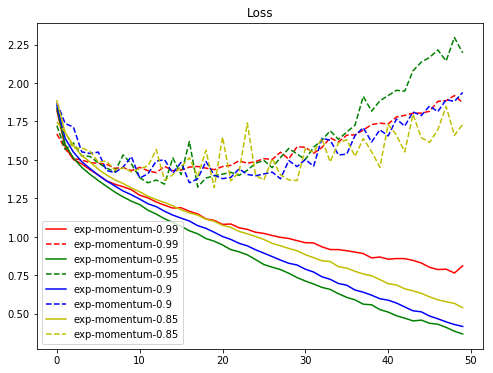

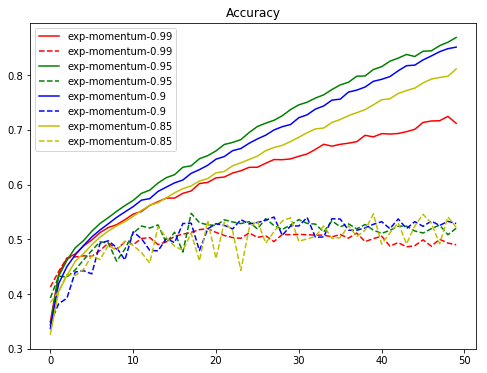

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()